<a href="https://colab.research.google.com/github/ryegunde/Neural_Network_From_Scratch/blob/main/Neural_Network_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network From Scratch

The purpose of this Journal is to provide a step by step guide to building a Neural Network from scratch with Python. The goal of this project is to gain some intuition about how Neural Networks work under the hood. By gaining  this insight I will be more prepared to apply NN to novel applications.

## 1. Anatomy of a Neuron

Neural Networks are roughly modeled off the brain. In the brain there are components called neruons. Each neuron has an input for each item in the previous layer and an output for each item  in the next layer. Each connection has a **weight** and each neuron itself has a **bias**. The first layer of a neural network is a feature vector where every feature is feed into every neuron.(**Note**: The layer that this feature vector in is refered to as the *input layer* and is the first layer of a neural network.) Each of these features has a value corresponding to a specific attribute of a sample. Based on these values and the pattern captured in the NN we generalize (make a decision). Mathematically each neuron does the following... 

(W.t)x+b

Below is a diagram of the connections that are going into an individual neuron

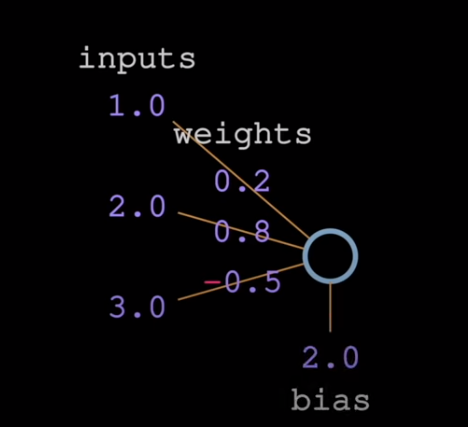

In [ ]:
inputs = [1,2,3]
weights = [0.2,0.8,-0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

2.3


Input layer -> (m)  Hidden layers -> Output  layer

#2. Layers

Now we are going to be looking at a full layer. In the previous step we constructed a single neuron. By adding more neurons we allow for more complex patterns to be captured by our model. As you can see in the diagram below each neuron is connected to each neuron from the previous layer. Each of these connections is known as a **weight** and each neuron has it's own **bias**. We will eneter each of these values in and manually calculate the output of each neuron in this layer.

**Note:** Usually we will never actually manually have to calculate each neurons idividual output manually or even through a loop. usually we will use a numpy array and matrix multiplication to quickly multiply all the features by all the wieghts and then add all the biases. This makes computation much quicker and much more efficent.

**Notes:** Weights give more impact to the more important features, Bais will simply provide an offset




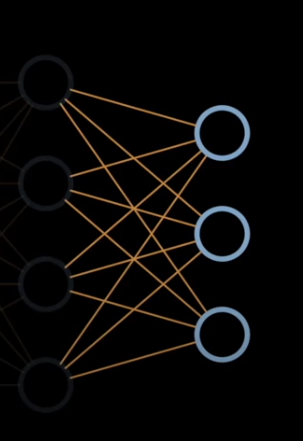

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [
           [0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]
          ]
bias = [2, 3, 0.5]

outputs = [
          weights[0][0]*inputs[0] + weights[0][1]*inputs[1] + weights[0][2]*inputs[2] + weights[0][3]*inputs[3] + bias[0],
          weights[1][0]*inputs[0] + weights[1][1]*inputs[1] + weights[1][2]*inputs[2] + weights[1][3]*inputs[3] + bias[1],
          weights[2][0]*inputs[0] + weights[2][1]*inputs[1] + weights[2][2]*inputs[2] + weights[2][3]*inputs[3] + bias[2]
          ]
print(outputs)

[4.8, 1.21, 2.385]


If you are wondering why are calculating (W.t)X+b at each neuron think of each neuron as a degree of freedom that can be manipulated. This linear function is the simplest function that captures a pattern. We can also do a transformation on this function. This transformation is called a neuron's activation function and we will look into which functions are best in which situation later on.

**pitfall**: One of the things that trips up students getting into Neural Networks the most is errors in the shape of their vectors.

list = [1,2,3,4] Shape: (4, ) This is a 1-D array (vector)
listoflists = [[1,2,3,4][5,6,7,8]] Shape (2,4) 2-D array (Matrix)
A matrix is a rectrangular array

A **tensor** is an object that can be represented as an array

#3. Understanding the Dot Product

Like I stated eailer there are much more efficient ways for calculating the output of each neuron rather than looping through and calculating them all manually. To understand how this efficient method works we need to understand how the dot product works. If we have a vector of inputs and a vector of weights and we take the dot product, what happens is that each element is multiplied with the corresponding element in the other vector and then all of these products are added together. Then we just add our bias.

To use this dot product function we will have to import a very poplar library for ML called numpy.
**Note:** It is important to recognize that we always dot the weights with the inputs, never the other way around. This is because when we up the dimensionality to more dimensions we will have to take the transpose of the Weights matrix. This is needed so that our output is the proper shape.

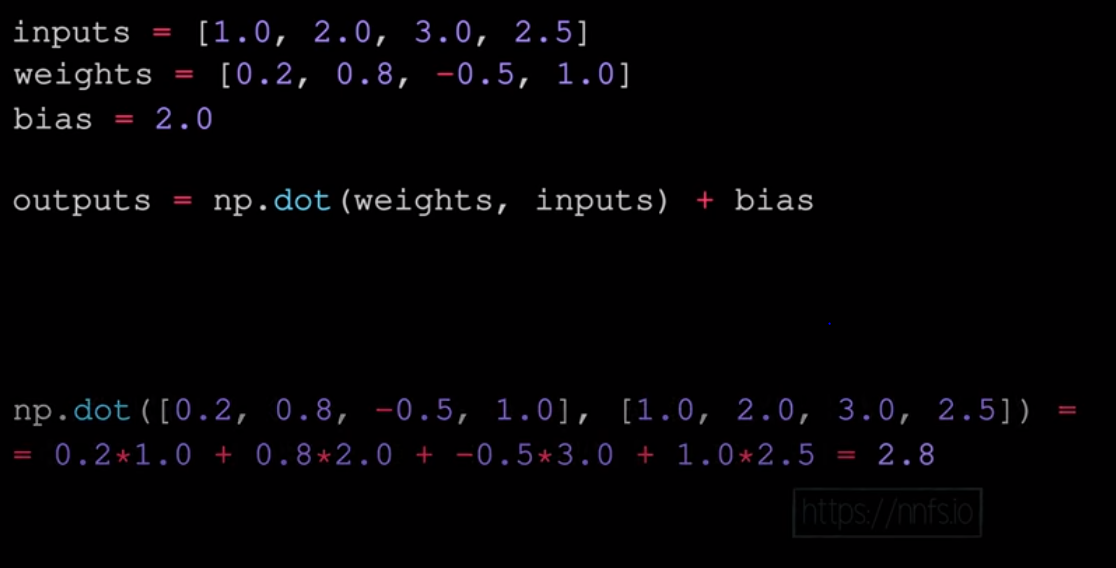

In [ ]:
import numpy as np

inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot(weights,inputs) + bias

print(output)

4.8


Okay now lets try the same example with the same input layer, but this time we will take the dot of a full layer of neurons rather than just one neuron

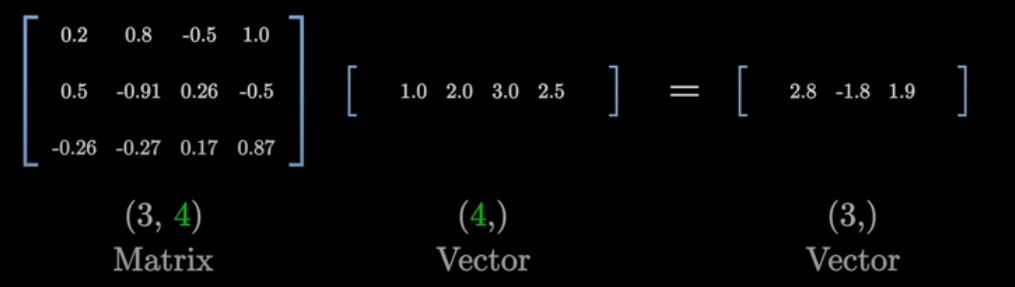

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [
           [0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]
          ]
bias = [2, 3, 0.5]

outputs = np.dot(weights,inputs) + bias
print(outputs)

[4.8   1.21  2.385]


#4. Batches

Each feature vector corresponds to a single sample. So instead of having to do the same process above for every single sample that we want to train our model on we can simply train on all the samples in parallel by using something called a **Batch**. All this means is that instead of using a feature vector, we use an array of feature vectors creating a feature matrix.

**Note:** This abaility to do all of this training in parallel is why we like to do training on a GPU rather than a CPU. CPUs typically only have 8 cores at most while GPUs can have hundreds if not thousands of cores, speeding up computaton speed by several orders of magnitude.

Another benefit to training using batches is that often our model will be able to generalize better. This is beacause if we try to update our model on every single sample, each update will have a huge affect on the model. However, if we simply update on each avg of batch size = 32. Then our model will be updated much more smoothly and is likely to better understand the underlying pattern in the data. However, A batch size that is too big is likely to lead to overfitting as it will litterally just fit to the pattern in the training data set.

Batch size = 32 seems like a generally good batch size for most applications

Computationally when we compute the dot product now we do (W.t)
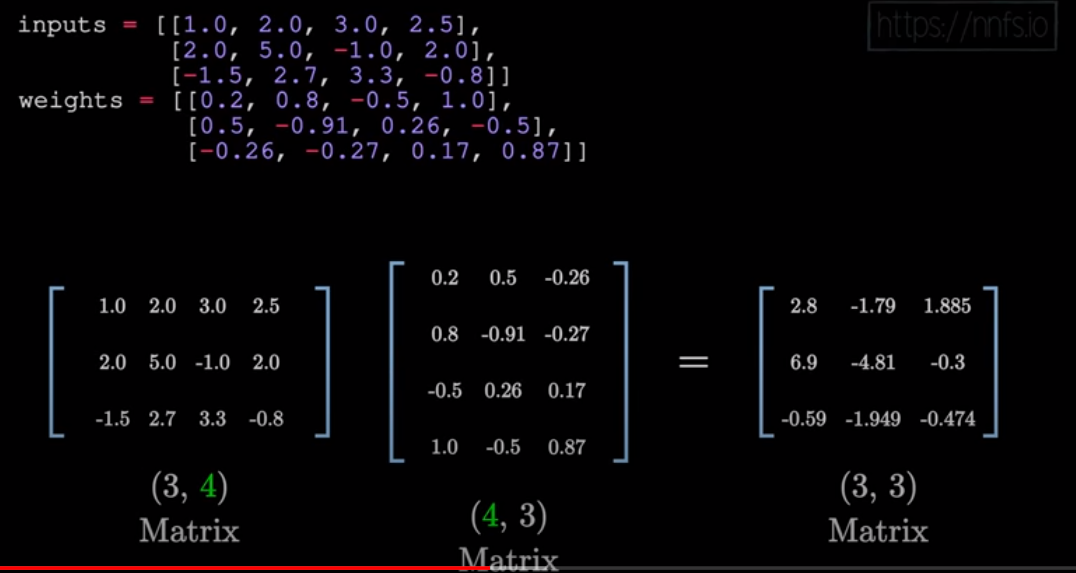
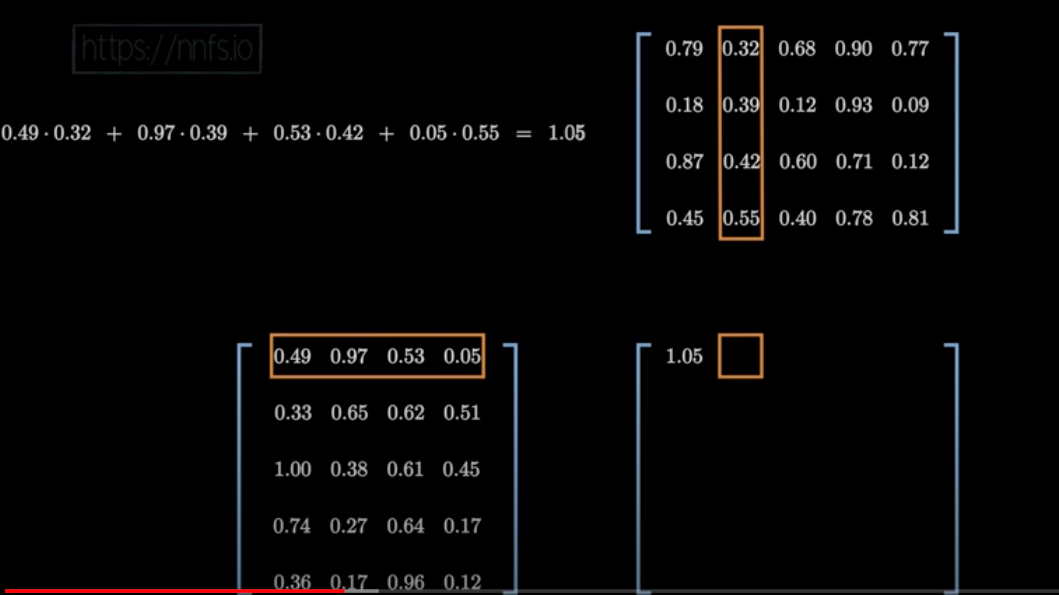

In [ ]:
samples = [[1, 2, 3, 2.5],
           [2, 5, -1, 2],
           [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

bias = [2, 3, 0.5]

#Note: np.dot() automatically converts python lists to np.arrays do we don't manually have to do that
#      However in this case since inputs has shape 3,4 and weights has shape 3,4 we will have to transpose
#      the weights matrix so that it becomes a 4,3 matrix. The resulting matrix will be 4,3 3,4 a 4,4 matrix
#      as the center two dimensions will cancel out. Inorder to tranpose we will have to turn the weights matrix
#      into a numpy array
#
#Note: Our bias vector is (3,) so we won't be able to add it if our matrix is 4x4 so instead lets sawp W.T and X so
#      that the outputted matrix is a 3x3
#      outputs = np.dot(np.array(weights).T,samples) = 4x4 matrix
outputs = np.dot(samples,np.array(weights).T) + bias

print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


REMEBER that the above case is a hidden layer of a neural network with 3 neurons in it. We are also training on 3 samples. Each nueron has 4 connections to the input layer and a unique bias. Lets try adding another hidden layer!

In [ ]:
#input matrix 3,4 means 3 samples 4 features each. 
samples = [[1, 2, 3, 2.5],
           [2, 5, -1, 2],
           [-1.5, 2.7, 3.3, -0.8]]

#weights matrix for layer1. 3,4 means 3 nuerons each with 4 connections
weights1 = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
#weights matrix for layer2. 3,3 means 3 neurons each with 3 connections
weights2 = [[0.1, -0.14, -0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
           
biases1 = [2, 3, 0.5]
biases2 = [-1, 2, -0.5]

layer1_output = np.dot(samples, np.array(weights1).T) + biases1
#We use the output from the previous layer as input to the next layer
layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2

print(layer1_output)
print(layer2_output)

Okay Great! However, this is not very dynamic, if we want to add more neurons to a layer this set up can quickly become too cumbersome. We can over come this by using objects!

Keep in mind that when we create a model the only thing unique about that model that you've trained are the weights and biases of that model. If we want to use a trained model, all we have to do is copy those weights and basis. However, if we are creating our own model from scratch we will need to initalize our weights and basises. We do this randomly, but we want to keep our values between -1 and 1. This is because if we don't then computations quickly get too big and values explode in size. By normalizing and scaling the data we can avoid this problem.

In [ ]:
import numpy as np

np.random.seed(0)

#Convention is to name the input Matrix X
X = [[1, 2, 3, 2.5],
     [2, 5, -1, 2],
     [-1.5, 2.7, 3.3, -0.8]]

#This object represents a hidden layer of our NN
class Layer_Dense:
  #need to initalize the weights and biases
  def  __init__(self, n_inputs, n_neurons):
    #randomly initalize weights and normalize
    self.weights_t = 0.1 * np.random.randn(n_inputs, n_neurons)
    #initalize biases to zeros (Note: In some cases this can lead to a dead model where no neurons activate)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights_t) + self.biases

layer1 = Layer_Dense(4, 5)
layer1.forward(X)
layer2 = Layer_Dense(5, 2)
layer2.forward(layer1.output)

print(layer2.output)


[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


#5. Activations functions
There are many different activation functions we can use

##Step function

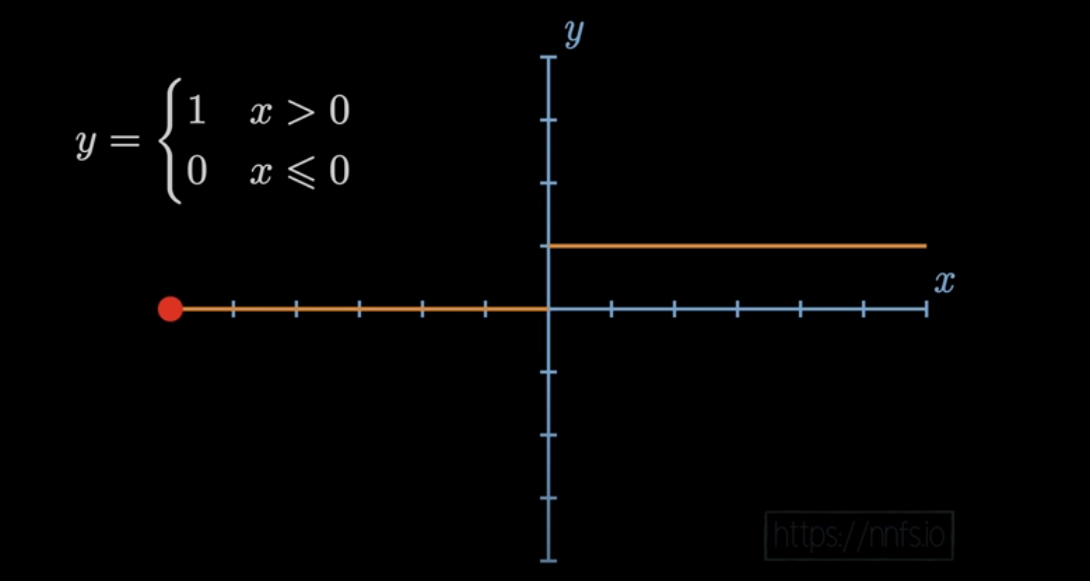

We still do the (W.T)X computation, but now that output is transformed by the activation function

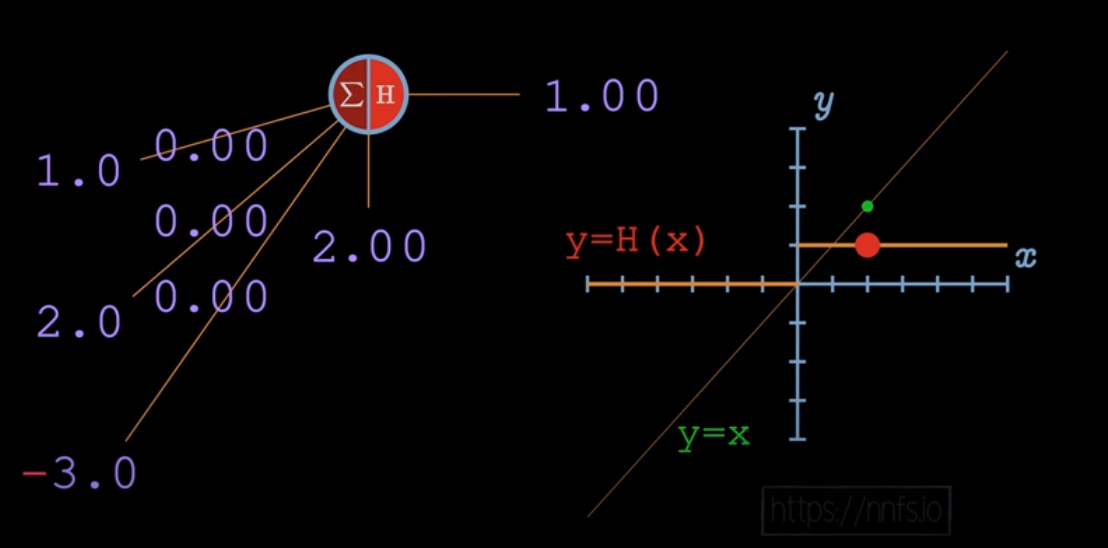

Generally your output layer will have a different activation function than your hidden layers.

A lot of the time we will use the sigmoid function for our hidden layers becuase it provides a more granular output than the step function. Since we have more data with this function, we can better determine how close our prediction was to the actual answer and so it allows us to optimize our loss function faster. (Faster learning) The optimizer can see how close the input was to becoming one.

Cons: Vanishing Gradient Problem

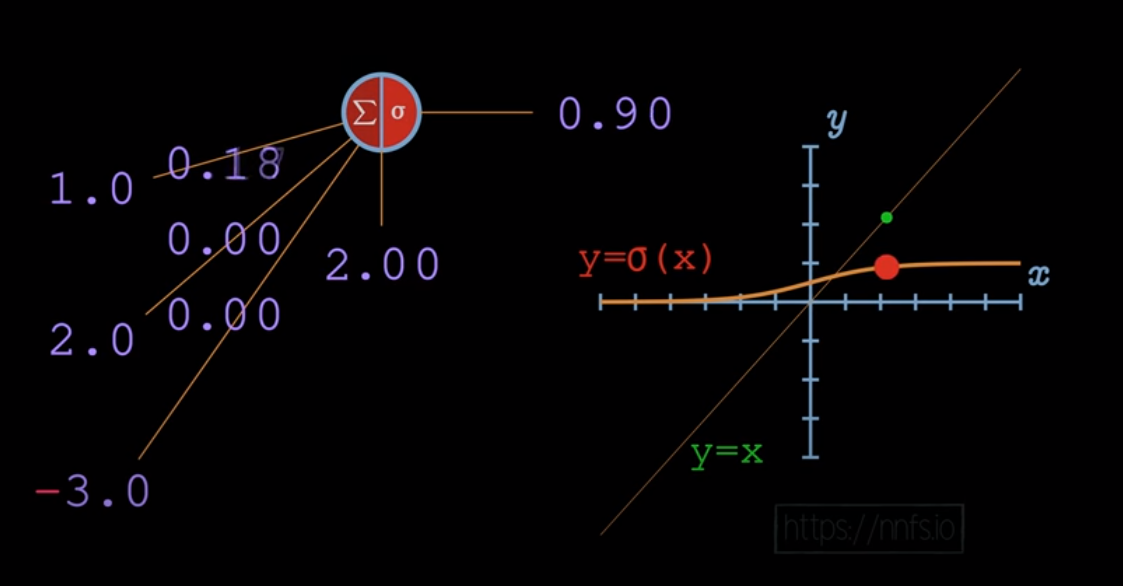

ReLU Function (Rectified Linear Unit)  Activation Function

if x is less than  0 output 0. O.W. output just x

Most commonly used activation function for hidden layers

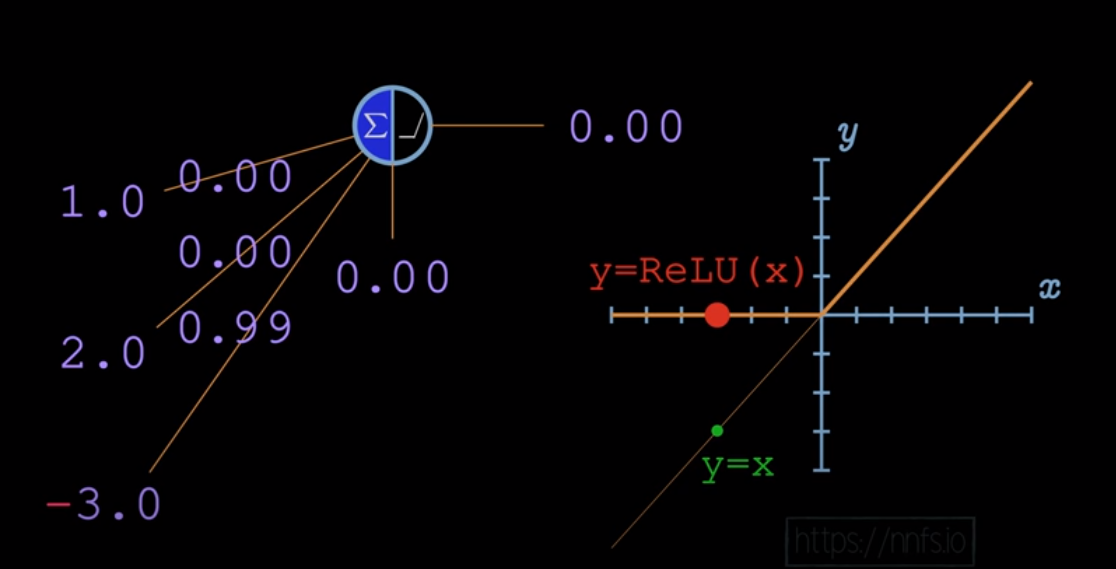

ReLu functions are used for a couple reasons


*   Extremly fast calculation
*   Granular

The activation function is meant to mimick the neurons in your brain. The way neurons work in your brain is that the synapsis needs to receive a signal who's strength passes an activation threshold in order for the neuron to fire. This function works in a similar way.

Also if we only use linear functions (no activation function) then our output at the end of the neural network can only be linear. This means that we can only capture linear patterns which isn't very useful.

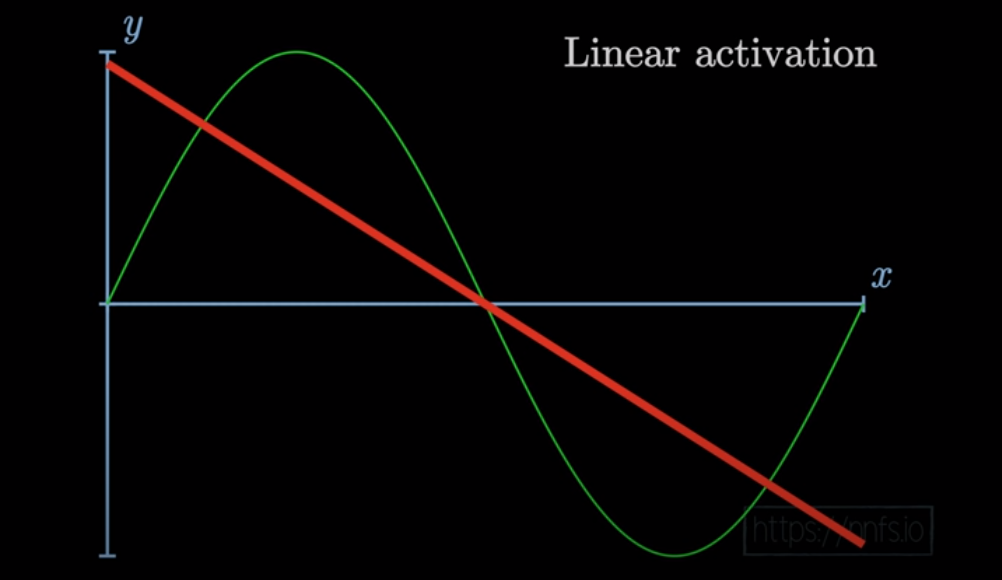

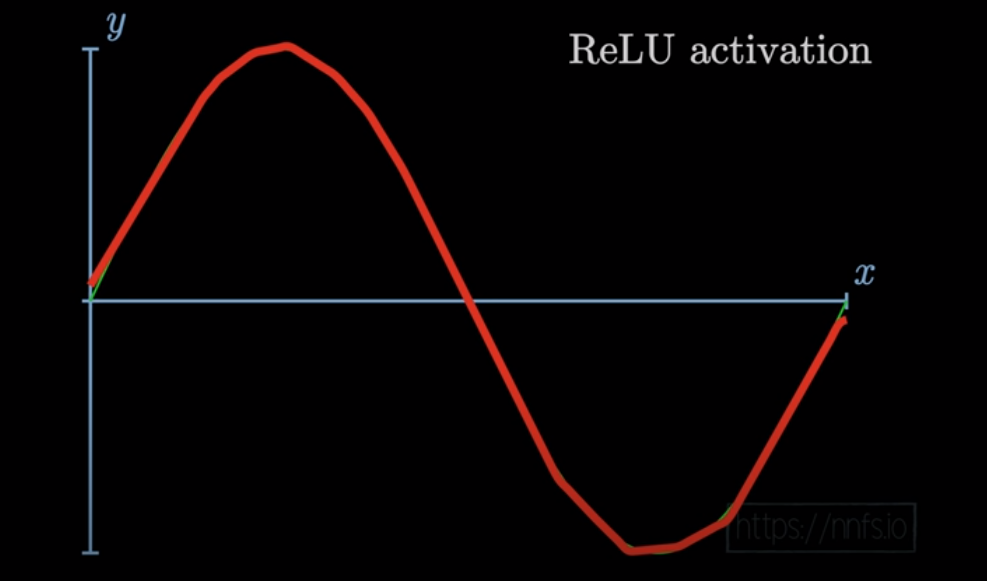



But why does the employment of the ReLU activation function allow us to capture this sine wave as seen above?

It has to do with the ReLu function not actually being a linear function. When we have one neuron it is simply an activation. When we have 2 layers of one neuron, we can negate the second neuron so that we have an activation and a deactivation. This allows us to have a upper and lower bound. By stacking more and more neurons we better fit to this sine function. 

1 neuron relu determines where the neuron activates
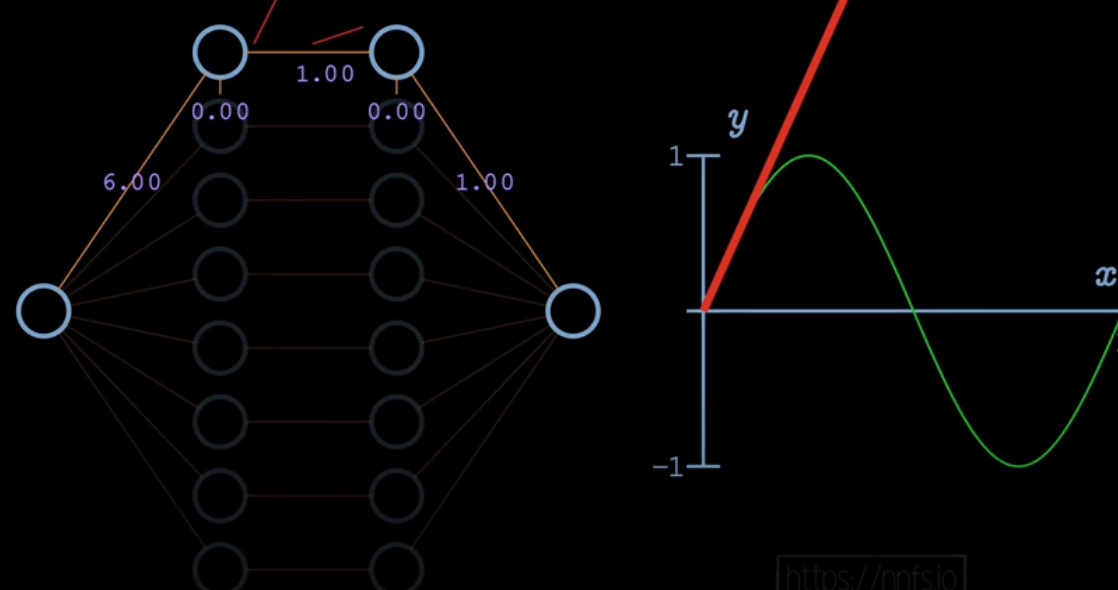

2 neurons in series ReLU. The second neuron simply says where the first neuron will deactivate. The bias picks up where we want the previous neuron to stop and we negate the previous neuron's slope.

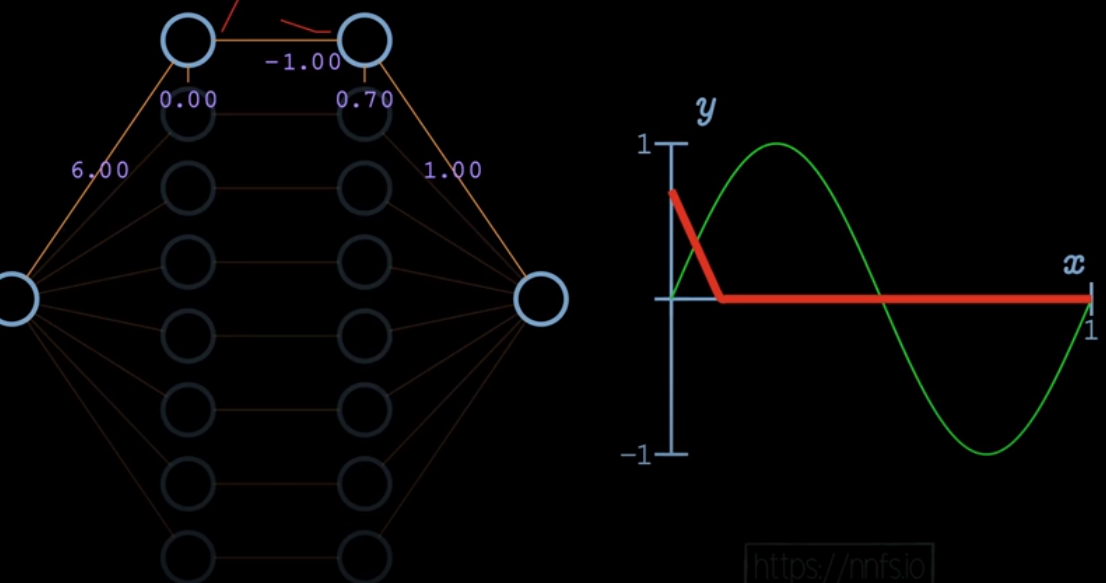

We use another series of neurons to offset our model to the right place so it begins to fit the sine function. We now have one piece of the function and we continue placing these "line segments" until we have fit our model. Each additional neuron allows for another line segment. Having more input connections leads to higher dimensionality which is hard to visualize here.

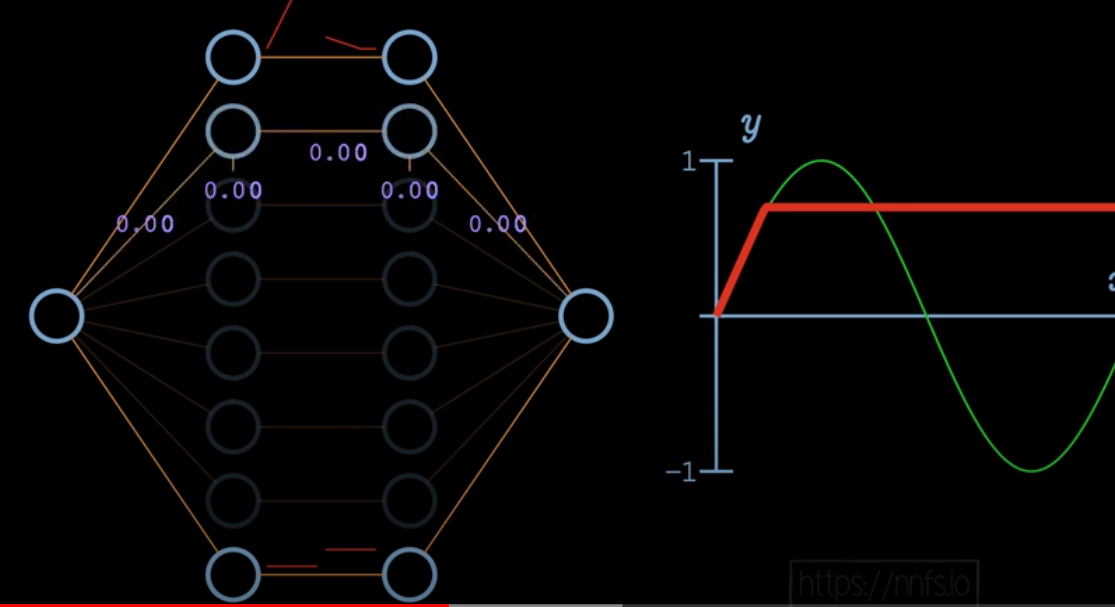

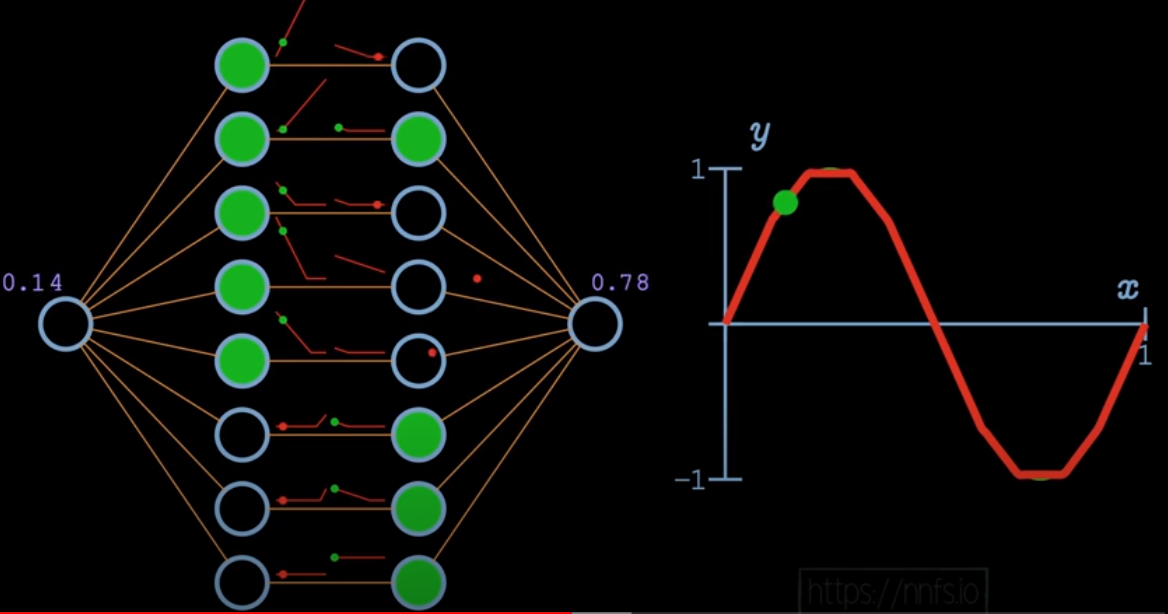

**Important Notes:** Inorder to capture no linear patterns we need at least two hidden layers and a non-linear activation function